### 12.7 plots

#### Juntamos todos los valores en un único array

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path


2025-06-03 16:16:11.374425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748960172.986582   67895 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748960173.441719   67895 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748960177.582500   67895 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748960177.582572   67895 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748960177.582575   67895 computation_placer.cc:177] computation placer alr

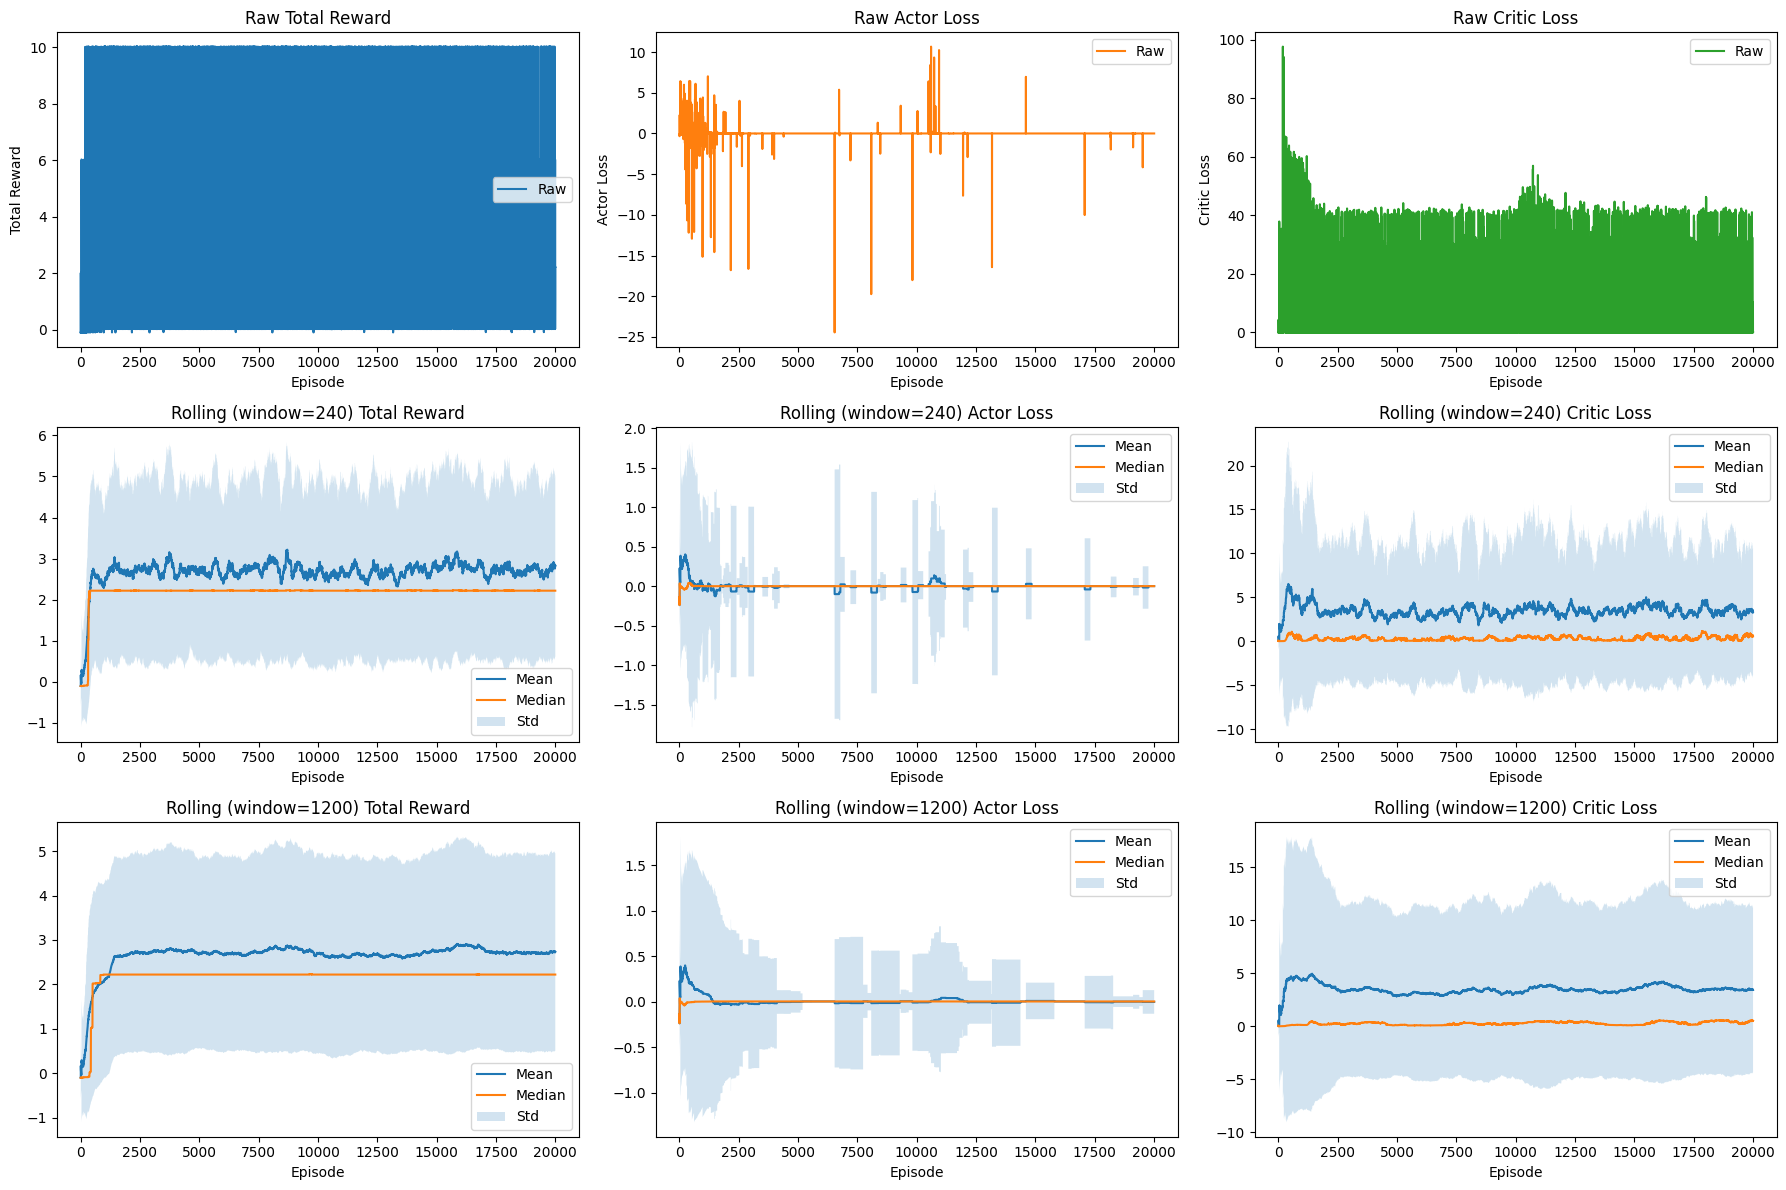

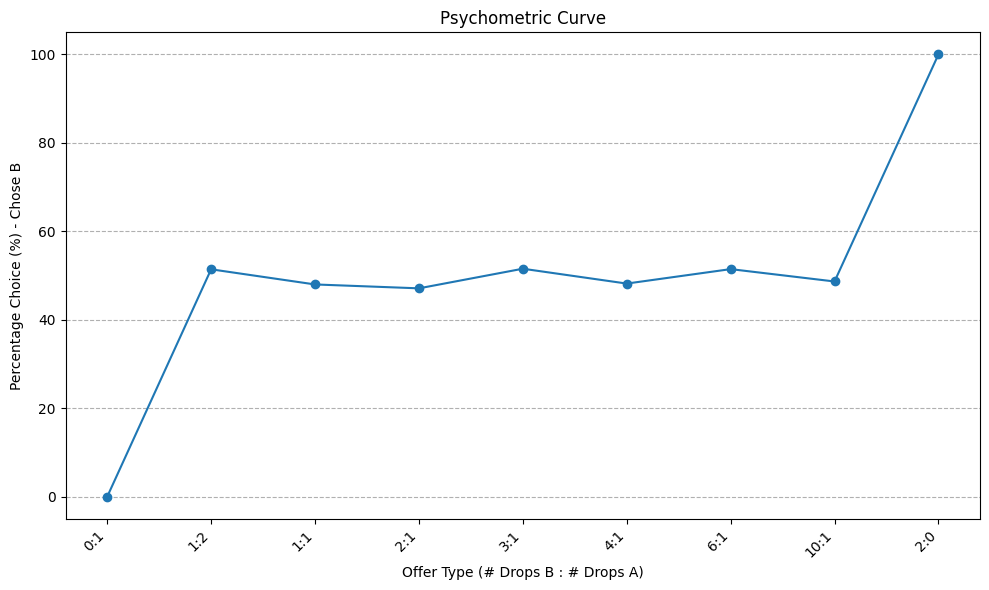

In [1]:
import pickle
import numpy as np
import os
import sys

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

from helper_functions import plot_metrics, plot_firing_rates, plot_psychometric_curve, activity_per_neuron

# --- Cargamos los datos ---

# Stage 1
pkl_path = "outputs/ffnn_nohold_max_partial.pkl"

with open(pkl_path, "rb") as f:
    total_rewards_history_1, \
    actor_loss_history_1, \
    critic_loss_history_1, \
    actor_firing_rates_1, \
    critic_firing_rates_1, \
    measurements_juices_1 = pickle.load(f)

# Stage 2
pkl_path = "outputs/ffnn_nohold_max_partial_2.pkl"

with open(pkl_path, "rb") as f:
    total_rewards_history_2, \
    actor_loss_history_2, \
    critic_loss_history_2, \
    actor_firing_rates_2, \
    critic_firing_rates_2, \
    measurements_juices_2 = pickle.load(f)

# --- Juntamos los arrays ---
total_rewards_history = np.concatenate([
    total_rewards_history_1,
    total_rewards_history_2
])

actor_loss_history = np.concatenate([
    actor_loss_history_1,
    actor_loss_history_2
])

critic_loss_history = np.concatenate([
    critic_loss_history_1,
    critic_loss_history_2
])

# --- Representamos los resultados ---
plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=240,
    window_2=1200
)

plot_psychometric_curve(measurements_juices_2, title="Psychometric Curve")